In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import imgkit

In [2]:
def read_multiple_results(model_name="", data_dir=""):
    excel_files = glob.glob(data_dir + f"{model_name}*.xlsx")
    print(f"Getting data from {excel_files}")
    # List to hold individual DataFrames
    dataframes = []
    for file in excel_files:
        df = pd.read_excel(file)
        dataframes.append(df)
    combined_dataframe = pd.concat(dataframes, ignore_index=True)
    combined_dataframe.reset_index(drop=True, inplace=True)
    return combined_dataframe

In [3]:
# gpt4_speed = pd.read_excel(
#     "test_results/azure_gpt4_result_2024-05-27 11:45:16.706027+08:00.xlsx"
# )
# gpt4t_speed = pd.read_excel(
#     "test_results/vender_4turbo_result_2024-05-27 11:48:33.727674+08:00.xlsx"
# )
# gpt4o_speed = pd.read_excel(
#     "test_results/vender_4o_result_2024-05-27 11:51:14.581741+08:00.xlsx"
# )

gpt4_speed = read_multiple_results(model_name="azure_gpt4", data_dir="test_results/")

gpt4t_speed = read_multiple_results(model_name="vender_4turbo", data_dir="test_results/")
gpt4o_speed = read_multiple_results(model_name="vender_4o", data_dir="test_results/")

Getting data from ['test_results/azure_gpt4_result_2024-05-27_114516+0800.xlsx', 'test_results/azure_gpt4_result_2024-05-27_140814+0800.xlsx', 'test_results/azure_gpt4_result_2024-05-28_114407+0800.xlsx', 'test_results/azure_gpt4_result_2024-05-27_144005+0800.xlsx']
Getting data from ['test_results/vender_4turbo_result_2024-05-27_141132+0800.xlsx', 'test_results/vender_4turbo_result_2024-05-28_114727+0800.xlsx', 'test_results/vender_4turbo_result_2024-05-27_114833+0800.xlsx', 'test_results/vender_4turbo_result_2024-05-27_144327+0800.xlsx']
Getting data from ['test_results/vender_4o_result_2024-05-27_115114+0800.xlsx', 'test_results/vender_4o_result_2024-05-27_144605+0800.xlsx', 'test_results/vender_4o_result_2024-05-28_115013+0800.xlsx', 'test_results/vender_4o_result_2024-05-27_141410+0800.xlsx']


In [4]:
gpt4_desc = gpt4_speed["execution_time"].describe()
gpt4t_desc = gpt4t_speed["execution_time"].describe()
gpt4o_desc = gpt4o_speed["execution_time"].describe()

# Combine the summary statistics into a single DataFrame
summary_stats = pd.concat([gpt4_desc, gpt4t_desc, gpt4o_desc], axis=1)

# Rename the columns to reflect the models
summary_stats.columns = ["GPT-4", "GPT-4 Turbo", "GPT-4 Omega"]

# Display the summary statistics
print(summary_stats)

# Convert DataFrame to HTML
summary_stats.to_markdown("doc/summary_stats.md")

            GPT-4  GPT-4 Turbo  GPT-4 Omega
count  352.000000   352.000000   352.000000
mean     1.689043     1.255313     0.813637
std      1.729892     0.734669     0.324275
min      0.589304     0.617619     0.543163
25%      0.740127     0.839886     0.657005
50%      0.994632     1.009786     0.717785
75%      1.867587     1.337416     0.813343
max     10.098297     5.393584     3.768585


/Users/dingdongliu/miniconda3/envs/venv/lib/python3.11/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dingdongliu/miniconda3/envs/venv/lib/python3.11/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dingdongliu/miniconda3/envs/venv/lib/python3.11/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

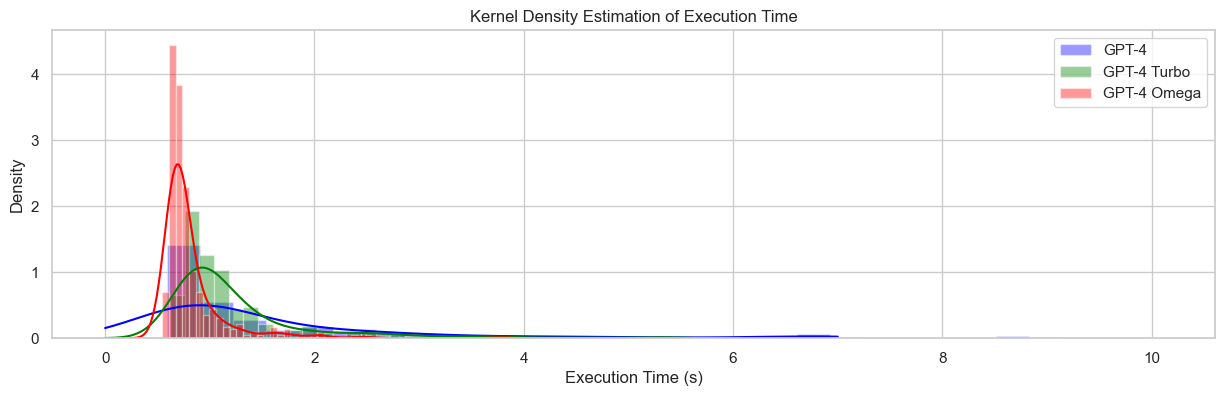

In [5]:
# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Create a figure
plt.figure(figsize=(15, 4))

sns.distplot(
    gpt4_speed["execution_time"],
    label="GPT-4",
    color="blue",
    hist=True,
    kde_kws={"clip": (0.0, 7)},
)
sns.distplot(
    gpt4t_speed["execution_time"],
    label="GPT-4 Turbo",
    color="green",
    hist=True,
    kde_kws={"clip": (0.0, 7)},
)
sns.distplot(
    gpt4o_speed["execution_time"],
    label="GPT-4 Omega",
    color="red",
    hist=True,
    kde_kws={"clip": (0.0, 7)},
)

# Set the title and labels
plt.title("Kernel Density Estimation of Execution Time")
plt.xlabel("Execution Time (s)")
plt.ylabel("Density")

# Show the legend
plt.legend()

# save the plot with tight layout
# plt.savefig("doc/execution_time.pdf")
plt.savefig("doc/execution_time.svg", bbox_inches="tight")

# Show the plot
plt.show()

<Figure size 1500x400 with 0 Axes>

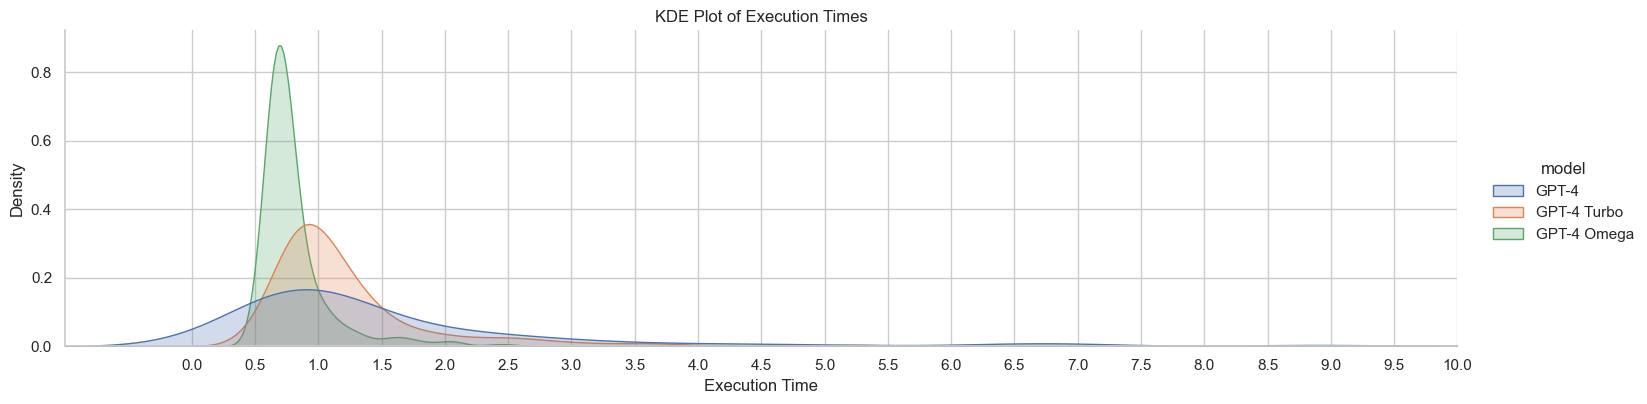

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gpt4_speed, gpt4t_speed, and gpt4o_speed are your dataframes

# Add a column to each dataframe to indicate the model and reset the index
gpt4_speed["model"] = "GPT-4"
gpt4_speed = gpt4_speed.reset_index(drop=True)

gpt4t_speed["model"] = "GPT-4 Turbo"
gpt4t_speed = gpt4t_speed.reset_index(drop=True)

gpt4o_speed["model"] = "GPT-4 Omega"
gpt4o_speed = gpt4o_speed.reset_index(drop=True)

# Combine the dataframes into one
combined_data = pd.concat([gpt4_speed, gpt4t_speed, gpt4o_speed], ignore_index=True)

# Set the figure size
plt.figure(figsize=(15, 4))

# Use displot to plot the combined data with different hues for each model
sns.displot(
    data=combined_data,
    x="execution_time",
    hue="model",
    kind="kde",
    fill=True,
    height=4,
    aspect=15 / 4,
)

# Adjust the x-axis range and ticks
plt.xlim(-1, 10)
plt.xticks(
    ticks=[x * 0.5 for x in range(21)]
)  # This creates ticks from 0 to 10 with a step of 0.5

# Add labels and title
plt.xlabel("Execution Time")
plt.ylabel("Density")
plt.title("KDE Plot of Execution Times")

# Save the plot
plt.savefig("doc/execution_time_kde.svg", bbox_inches="tight")

# Show the plot
plt.show()

<Figure size 1500x400 with 0 Axes>

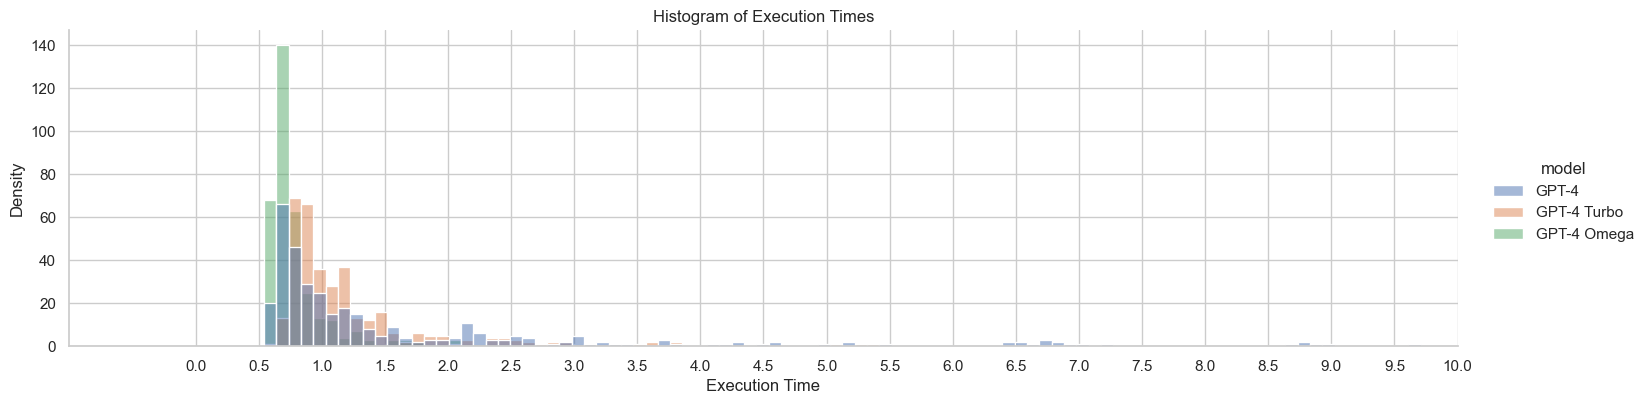

In [7]:
# plot a histogram version of the same data

# Set the figure size
plt.figure(figsize=(15, 4))

# Use displot to plot the combined data with different hues for each model
sns.displot(
    data=combined_data,
    x="execution_time",
    hue="model",
    kind="hist",
    fill=True,
    height=4,
    aspect=15 / 4,
)

# Adjust the x-axis range and ticks
plt.xlim(-1, 10)
plt.xticks(
    ticks=[x * 0.5 for x in range(21)]
)  # This creates ticks from 0 to 10 with a step of 0.5

# Add labels and title
plt.xlabel("Execution Time")
plt.ylabel("Density")
plt.title("Histogram of Execution Times")

# Save the plot
plt.savefig("doc/execution_time_hist.svg", bbox_inches="tight")

# Show the plot
plt.show()


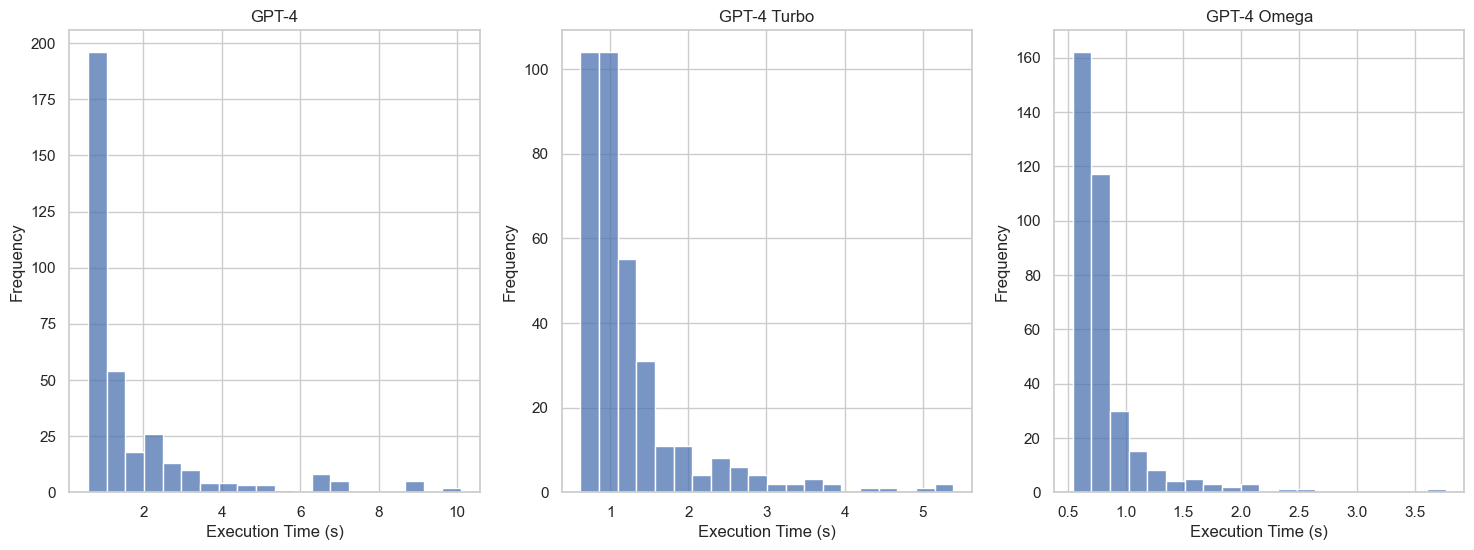

In [8]:
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data=gpt4_speed, x="execution_time", bins=20, ax=axs[0])
axs[0].set_title("GPT-4")
axs[0].set_xlabel("Execution Time (s)")
axs[0].set_ylabel("Frequency")

sns.histplot(data=gpt4t_speed, x="execution_time", bins=20, ax=axs[1])
axs[1].set_title("GPT-4 Turbo")
axs[1].set_xlabel("Execution Time (s)")
axs[1].set_ylabel("Frequency")

sns.histplot(data=gpt4o_speed, x="execution_time", bins=20, ax=axs[2])
axs[2].set_title("GPT-4 Omega")
axs[2].set_xlabel("Execution Time (s)")
axs[2].set_ylabel("Frequency")

plt.show()


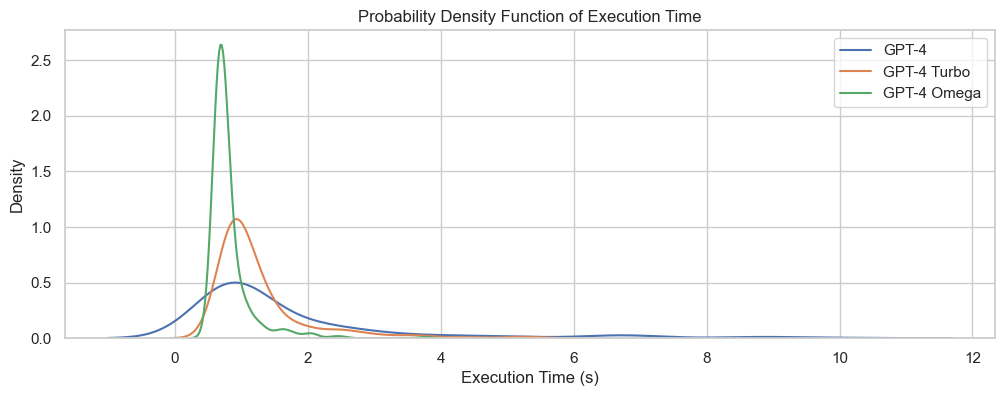

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Create a figure
plt.figure(figsize=(12, 4))

# Plot the KDE for GPT-4
sns.kdeplot(data=gpt4_speed["execution_time"], label="GPT-4")

# Plot the KDE for GPT-4 Turbo
sns.kdeplot(data=gpt4t_speed["execution_time"], label="GPT-4 Turbo")

# Plot the KDE for GPT-4 Omega
sns.kdeplot(data=gpt4o_speed["execution_time"], label="GPT-4 Omega")

# plt.xlim(0, 10)

# Set the title and labels
plt.title("Probability Density Function of Execution Time")
plt.xlabel("Execution Time (s)")
plt.ylabel("Density")

# Show the legend
plt.legend()

# Show the plot
plt.show()

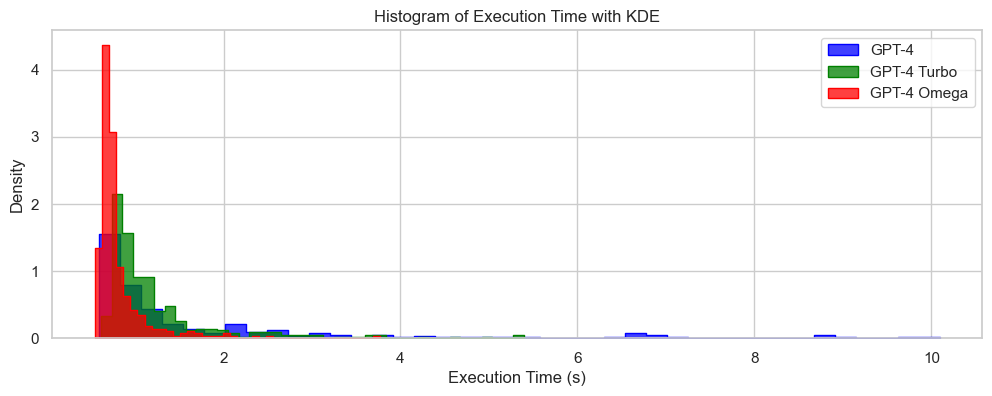

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Create a figure
plt.figure(figsize=(12, 4))

# Plot the histogram for GPT-4
sns.histplot(
    gpt4_speed["execution_time"],
    label="GPT-4",
    color="blue",
    # kde=True,
    element="step",
    bins=40,
    stat="density",
    common_norm=False,
)

# Plot the histogram for GPT-4 Turbo
sns.histplot(
    gpt4t_speed["execution_time"],
    label="GPT-4 Turbo",
    color="green",
    # kde=True,
    element="step",
    bins=40,
    stat="density",
    common_norm=False,
)

# Plot the histogram for GPT-4 Omega
sns.histplot(
    gpt4o_speed["execution_time"],
    label="GPT-4 Omega",
    color="red",
    # kde=True,
    element="step",
    bins=40,
    stat="density",
    common_norm=False,
)

# Set the title and labels
plt.title("Histogram of Execution Time with KDE")
plt.xlabel("Execution Time (s)")
plt.ylabel("Density")

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [11]:
# Read the main markdown file
import re


with open("README.md", "r") as file:
    main_content = file.read()

# Read the table markdown file
with open("doc/summary_stats.md", "r") as file:
    table_content = file.read()

# Define the start and end markers
start_marker = "<!-- SUMMARY_STATISTICS_PLACEHOLDER_BEGIN -->"
end_marker = "<!-- SUMMARY_STATISTICS_PLACEHOLDER_END -->"

# Create a regex pattern to find the content between the markers
pattern = re.compile(
    re.escape(start_marker) + r"(.*?)" + re.escape(end_marker), re.DOTALL
)

# Replace the content between the markers with the table content
new_content = pattern.sub(
    start_marker + "\n" + table_content + "\n" + end_marker, main_content
)


# Save the combined content to a new markdown file
with open("README.md", "w") as file:
    file.write(new_content)

print("Table inserted and saved to README.md")

Table inserted and saved to README.md
